In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [22]:
myData = pd.read_csv('AdmitData.csv')
myData.head(10)

,Admit,GPA,SAT
0,1,3.1,1550
1,0,2.7,1360
2,1,2.6,1470
3,1,3.7,1450
4,1,3.1,1500
5,1,4.0,1440
6,1,3.4,1510
7,0,2.8,1120
8,1,4.2,1090
9,0,2.6,1300


In [23]:
myData.describe()

,Admit,GPA,SAT
count,120.000000,120.000000,120.000000
mean,0.600000,3.449167,1300.750000
std,0.491952,0.591252,172.695693
min,0.000000,2.500000,1000.000000
25%,0.000000,2.900000,1147.500000
50%,1.000000,3.400000,1315.000000
75%,1.000000,4.000000,1452.500000
max,1.000000,4.500000,1590.000000


In [24]:
x = myData.drop('Admit', axis = 1)
y = myData['Admit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 16, stratify = y)


In [25]:
standardizer = StandardScaler().fit(x_train)

x_trainS = pd.DataFrame(standardizer.transform(x_train), columns = x_train.columns)
x_testS = pd.DataFrame(standardizer.transform(x_test), columns = x_test.columns)

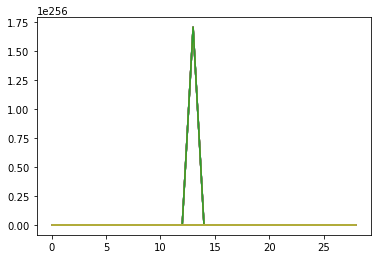

In [26]:
kvalues = np.arange(1,30)

accuracy_train = np.empty(len(kvalues))
accuracy_test = np.empty(len(kvalues))

for i, k in enumerate(kvalues):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_trainS, y_train)
    
    accuracy_train[i] = knn.score(x_trainS, y_train)
    accuracy_test[i] = knn.score(x_testS, y_test)
    
    sns.lineplot(data = accuracy_test)

In [28]:
kvalues = np.arange(1,30)

for i, k in enumerate(kvalues):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_trainS, y_train)
    
    accuracy_train[i] = knn.score(x_trainS, y_train)
    accuracy_test[i] = knn.score(x_testS, y_test)

In [30]:
accuracy_table = pd.DataFrame({'k': kvalues, 'train accuracy': accuracy_train, 'test accuracy': accuracy_test})
accuracy_table.sort_values('test accuracy', ascending = False)

,k,train accuracy,test accuracy
16,17,0.773810,0.833333
14,15,0.761905,0.777778
15,16,0.785714,0.777778
22,23,0.761905,0.777778
20,21,0.761905,0.777778
18,19,0.761905,0.777778
28,29,0.750000,0.777778
23,24,0.773810,0.750000
27,28,0.761905,0.750000
10,11,0.773810,0.750000


In [31]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_trainS, y_train)
knn.score(x_testS, y_test)

0.8333333333333334

In [32]:
predictions = knn.predict(x_testS)
print(predictions)

[1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1]


In [33]:
confusion_matrix(y_test, predictions)

array([[11,  3],
       [ 3, 19]], dtype=int64)

In [34]:
confusion = confusion_matrix(y_test, predictions)

TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy', np.round(Accuracy,2))

Specificity = (TN)/(TN + FP)
print('Specificity', np.round(Specificity,2))

Precision = (TP)/(TP + FP)
print('Precision', np.round(Precision,2))

Sensitivity = (TP)/(TP + FN)
print('Sensitivity', np.round(Sensitivity,2))

Accuracy 0.83
Specificity 0.79
Precision 0.86
Sensitivity 0.86
